# Práctica 7. Tensores en Ciencia de Datos

En **Ciencia de Datos**, un **tensor de orden $n$ es un contenedor que guarda 
datos en dimensión $n$**. Así, un tensor de orden 1 es un 
vector, que podemos representar en un eje. Un tensor de orden 2 una matriz, 
que representamos usando dos ejes. Un tensor de orden 3 es una estructura 
tridimensional de datos, y así sucesivamente. 

Los datos asociados a una imagen tri-dimensional se pueden almacenar en un 
tensor de orden 3. Una película, en un tensor de orden 4.

La librería de **Machine Learning** de Google se llama 
[tensorflow](https://www.tensorflow.org/)

![Este gráfico puede ser ilustrativo](../data/tensor1.webp)

In [11]:
import numpy as np

Introducimos tensores en NumPy usando **ndarray**

In [12]:
T = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
    [[11, 12, 13], [14, 15, 16], [17, 18, 19]],
    [[21, 22, 23], [24, 25, 26], [27, 28, 29]]
    ])

print(f"T = \n {T}")

T = 
 [[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[11 12 13]
  [14 15 16]
  [17 18 19]]

 [[21 22 23]
  [24 25 26]
  [27 28 29]]]


In [13]:
# algunos atributos interesantes de un tensor

print(f"forma del tensor = {T.shape}")
print(f"dimensión del tensor (número de ejes) = {T.ndim}")

forma del tensor = (3, 3, 3)
dimensión del tensor (número de ejes) = 3


## Aritmética básica con tensores

In [14]:
A = np.array([
    [[1, 2, 3], [4, 5,6 ], [7, 8, 9]],
    [[11, 12, 13], [14, 15, 16], [17, 18, 19]],
    [[21, 22, 23], [24, 25, 26], [27, 28, 29]]
    ])

B = np.array([
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]], 
    [[11, 12, 13], [14, 15, 16], [17, 18, 19]],
    [[21, 22, 23], [24, 25, 26], [27, 28, 29]]
    ])
# suma y resta
print(f"A + B = \n {A + B}")
print(f"A - B = \n {A - B}")


A + B = 
 [[[ 2  4  6]
  [ 8 10 12]
  [14 16 18]]

 [[22 24 26]
  [28 30 32]
  [34 36 38]]

 [[42 44 46]
  [48 50 52]
  [54 56 58]]]
A - B = 
 [[[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]]]


In [15]:
# producto (de Hadamard) y división componente a componente

print(f"A * B = \n {A * B}")
print(f"A / B = \n {A / B}")

A * B = 
 [[[  1   4   9]
  [ 16  25  36]
  [ 49  64  81]]

 [[121 144 169]
  [196 225 256]
  [289 324 361]]

 [[441 484 529]
  [576 625 676]
  [729 784 841]]]
A / B = 
 [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


## [Producto tensorial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.tensordot.html)

El producto tensorial de dos tensores de orden 1, $a, b$, proporciona un vector 
de orden 2, denotado $a\otimes b$, con entradas 
$\left( a\otimes b\right)_{ij} = a_i b_j$.

In [16]:
# producto tensorial de dos vectores
a = np.array([1, 2])
b = np.array([3, 4, 5])
# calculamos el producto tensorial con el método tensordot de numpy
C = np.tensordot(a, b, axes=0) 
# axes=0 para producto tensorial
print(f"a ⊗ b = \n {C}")

# axes=1 para el producto escalar de dos vectores
c = np.array([3, 4])
D = np.tensordot(a, c, axes=1)
print(f"producto escalar de a y c = {D}")

a ⊗ b = 
 [[ 3  4  5]
 [ 6  8 10]]
producto escalar de a y c = 11


Producto tensorial de dos matrices (tensores de orden 2) produce un tensor de 
orden 4

In [17]:
A = np.array([
    [1, 2],
    [3, 4]
])
B = np.array([
    [5, 6, 7],
    [8, 8, 9]
])
C = np.tensordot(A, B, axes=0)
print(f"A ⊗ B = \n {C}")
print(f"forma de A ⊗ B =  {C.shape}")
print(f"dimensión de A ⊗ B =  {C.ndim}")



A ⊗ B = 
 [[[[ 5  6  7]
   [ 8  8  9]]

  [[10 12 14]
   [16 16 18]]]


 [[[15 18 21]
   [24 24 27]]

  [[20 24 28]
   [32 32 36]]]]
forma de A ⊗ B =  (2, 2, 2, 3)
dimensión de A ⊗ B =  4


Nótese que el tensor de orden 4 se ha formado apilando $2$ bloques cada uno de 
los cuales contiene $2$ matrices, y cada matriz es de tamaño $2\times 3$.

Para el caso de producto tensorial de matrices, es habitual agrupar todos los 
datos del tensor de orden 4 resultante del producto tensorial de dichas matrices
, en una sóla matriz. Es lo que se le suele llamar el 
[producto de Kronecker](https://numpy.org/doc/stable/reference/generated/numpy.kron.html) 
de dos matrices.
En concreto, sean $A = (a_{ij}), B = (b_{ij})$ dos matrices. El producto de 
Kronecker de $A$ y $B$, que se denota igual que el producto tensorial, se define 
como matris pror bloques como 
$$ A\otimes B = \left[ \begin{array}{llll}
a_{11}B & a_{12}B & \cdots & a_{1n}B \\
a_{21}B & a_{22}B & \cdots & a_{2n}B \\
\cdots  & \cdots  & \cdots & \cdots  \\
a_{m1}B & a_{m2}B & \cdots & a_{mn}B 
\end{array}\right]$$

In [18]:
# usamos kron(A, B) en numpy para calcula el producto de Kronecker
print(f"A ⊗ B = \n {np.kron(A, B)}")

A ⊗ B = 
 [[ 5  6  7 10 12 14]
 [ 8  8  9 16 16 18]
 [15 18 21 20 24 28]
 [24 24 27 32 32 36]]


## Convirtiendo imágenes en tensores  y viceversa, tensores en imágenes

![imagen de agüjero negro de la nasa](../data/nasa.jpeg)

Veamos ahora cómo convertir la imagen anterior en un tensor. 

Necesitamos cargar 
la [Python Imaging Library (PIL)](https://recursospython.com/guias-y-manuales/instalar-pil-pillow-efectos/), 
librería gratuita que permite la edición de 
imágenes directamente desde Python.

In [19]:

from PIL import Image

img = Image.open("../data/nasa.jpeg")
imgarray = np.array(img)
print(f"foto nasa en formato tensor de orden 3 \n {imgarray}")
print(imgarray.shape)
# guardamos el tensor en un fichero de tipo np
np.save("../data/tensor_nasa.npy", imgarray)  # sin comprimir


foto nasa en formato tensor de orden 3 
 [[[ 11   9  33]
  [  5   3  27]
  [  9   7  31]
  ...
  [ 19  14  46]
  [ 19  14  46]
  [ 19  14  46]]

 [[  0   0  21]
  [  6   4  28]
  [ 19  17  41]
  ...
  [ 21  16  48]
  [ 21  16  48]
  [ 21  16  48]]

 [[  0   0  21]
  [ 38  36  60]
  [ 52  50  74]
  ...
  [  9   4  36]
  [  9   4  36]
  [  9   4  36]]

 ...

 [[ 35  23 135]
  [ 45  35 147]
  [ 25  13 125]
  ...
  [184 133 129]
  [184 134 125]
  [187 135 124]]

 [[ 49  37 149]
  [ 49  37 149]
  [ 52  40 152]
  ...
  [197 146 129]
  [198 146 125]
  [199 147 126]]

 [[ 79  62 174]
  [ 65  48 160]
  [ 55  38 150]
  ...
  [211 159 135]
  [213 159 131]
  [214 158 131]]]
(201, 251, 3)


Y viceversa, de tensor a imagen

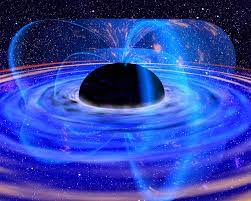

In [20]:
# cargamos el fichero que contiene los datos del tensor
tensor_imagen = np.load("../data/tensor_nasa.npy")
# convertimos el tensor en la imagen
nasa_reload = Image.fromarray(tensor_imagen)
nasa_reload


